# Preparate a cropped image of the Momotombo eruption from 2015

In [1]:
from pathlib import Path
import shutil
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from functions import crop_scene, load_scene, rgb_composite, save_scene

Load and crop the scene.

In [2]:
region = [3500, 3800, 5800, 6100]
before= crop_scene(
    load_scene(
        "/home/leo/Dropbox/leo/liverpool/ENVS258-EnvironmentalGeophysics/data/momotombo_eruption_2015/LC08_L2SP_017051_20151103_20200908_02_T1/", 
        pattern="[0-9]*",
    ),
    region,
)
after= crop_scene(
    load_scene(
        "/home/leo/Dropbox/leo/liverpool/ENVS258-EnvironmentalGeophysics/data/momotombo_eruption_2015/LC08_L2SP_017051_20151205_20200908_02_T1/", 
        pattern="[0-9]*",
    ),
    region,
)

Plot it to make sure it looks good.

In [3]:
rgb_before = rgb_composite(before, in_range=(5000, 18000))
rgb_after = rgb_composite(after, in_range=(5000, 18000))

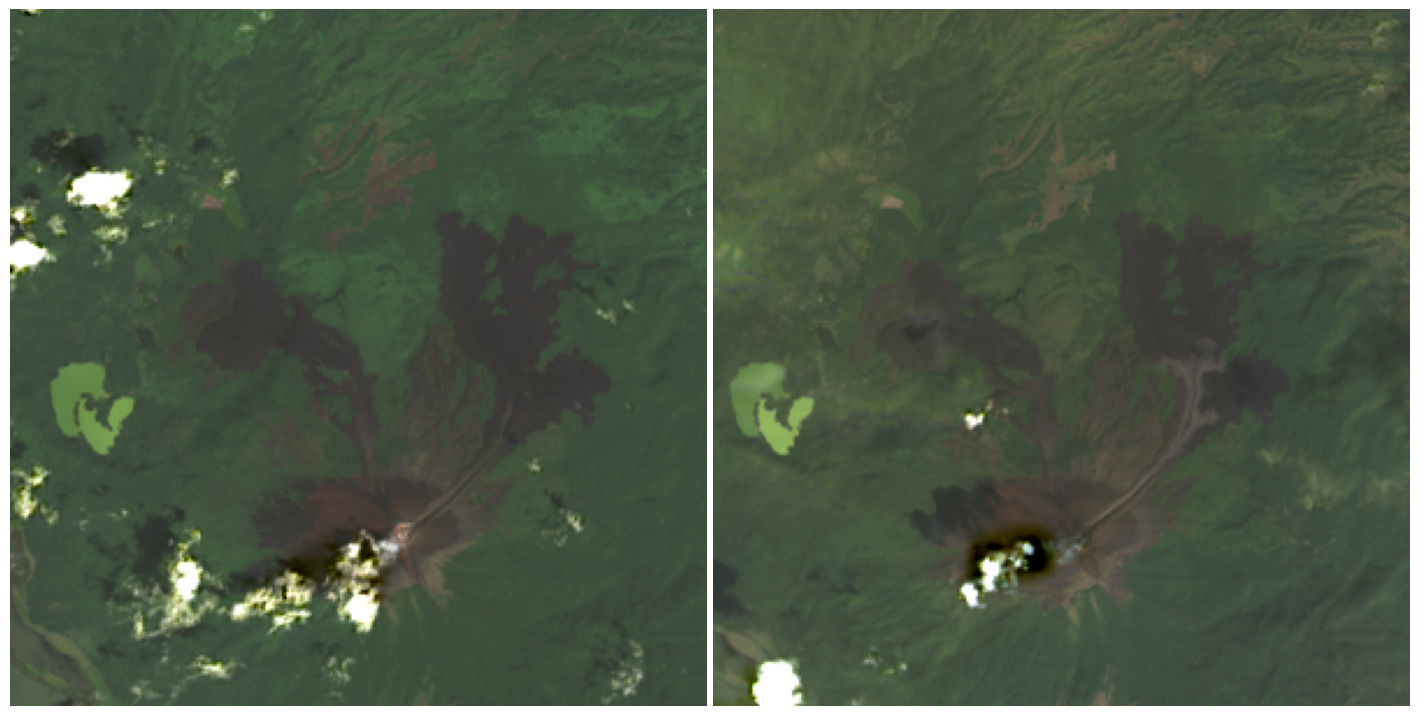

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8), dpi=100)
ax1, ax2 = axes
ax1.imshow(rgb_before)
ax2.imshow(rgb_after)
for ax in axes:
    ax.axis("off")
plt.tight_layout(pad=0, w_pad=0.5, h_pad=0)

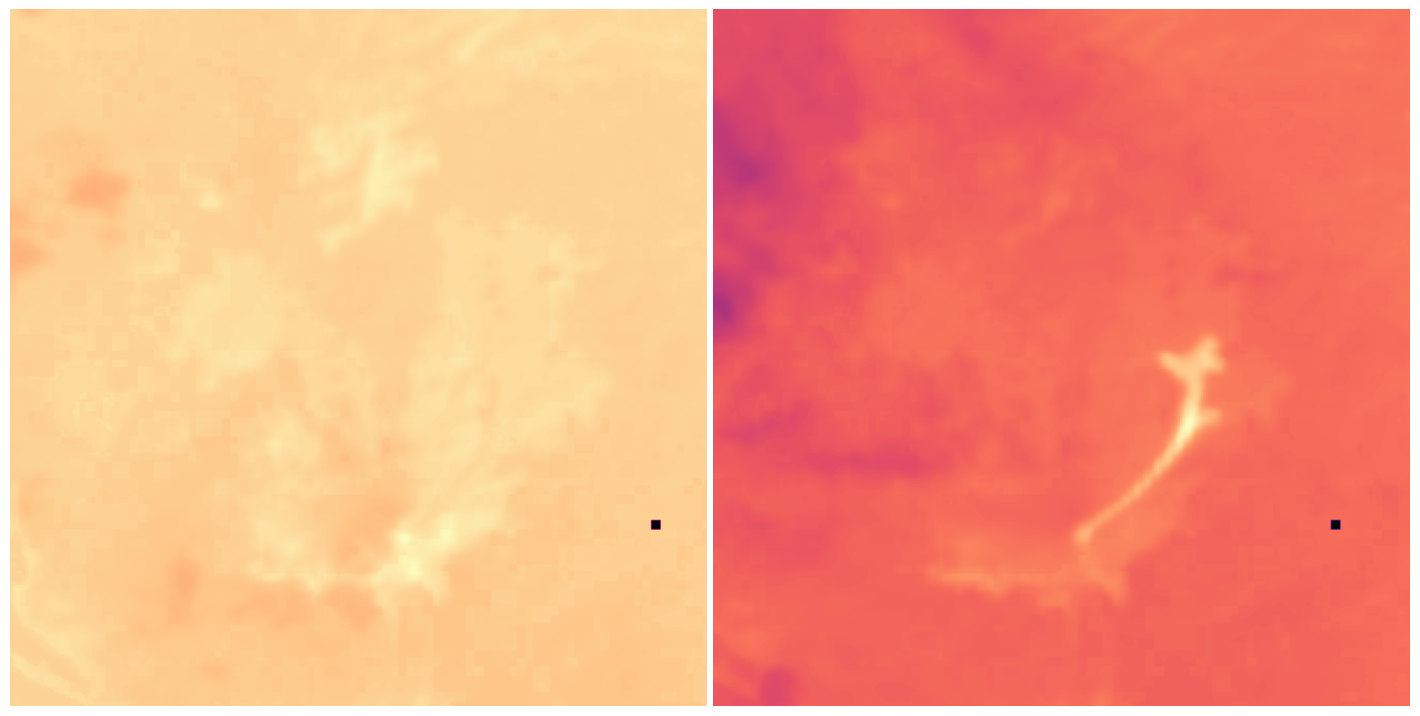

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8), dpi=100)
ax1, ax2 = axes
ax1.imshow(before[10], cmap="magma")
ax2.imshow(after[10], cmap="magma")
for ax in axes:
    ax.axis("off")
plt.tight_layout(pad=0, w_pad=0.5, h_pad=0)

Save the important bands of these scenes to TIF files.

In [6]:
data_folder = Path("../data/momotombo/")
scenes = [before, after]
destinations = [
    data_folder / "LC08_L2SP_017051_20151103_20200908_02_T1_cropped",
    data_folder / "LC08_L2SP_017051_20151205_20200908_02_T1_cropped",
]
prefixes = [
    "LC08_L2SP_017051_20151103_20200908_02_T1_",
    "LC08_L2SP_017051_20151205_20200908_02_T1_",
]
for scene, destination, prefix in zip(scenes, destinations, prefixes):
    save_scene(scene, destination, prefix)
shutil.make_archive(data_folder, format="zip", root_dir=data_folder)

/home/leo/edu/remote-sensing/code/functions.py:76: UserWarning: ../data/momotombo/LC08_L2SP_017051_20151205_20200908_02_T1_cropped/LC08_L2SP_017051_20151205_20200908_02_T1_B2.TIF is a low contrast image
  skimage.io.imsave(fname, scene[band])
/home/leo/edu/remote-sensing/code/functions.py:76: UserWarning: ../data/momotombo/LC08_L2SP_017051_20151205_20200908_02_T1_cropped/LC08_L2SP_017051_20151205_20200908_02_T1_B1.TIF is a low contrast image
  skimage.io.imsave(fname, scene[band])


'/home/leo/edu/remote-sensing/data/momotombo.zip'

In [7]:
! du -h ../data/momotombo*

1.5M	../data/momotombo/LC08_L2SP_017051_20151205_20200908_02_T1_cropped
1.3M	../data/momotombo/LC08_L2SP_017051_20151103_20200908_02_T1_cropped
2.7M	../data/momotombo
2.1M	../data/momotombo.zip
